<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/008_Custom_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 8: Custom Layers

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

Reference: https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

In [16]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [17]:
print(tf.__version__)

2.5.0


In [18]:
def loadThumb(path):
  # Let's import this video thumbnail!
  myThumb = plt.imread(path)
  fig, ax = plt.subplots(figsize=(15, 10))
  plt.axis('off')
  ax.imshow(myThumb)
  plt.show()

# loadThumb('/tmp/yt_thumb_008.png')


#### Video Topics
> 1. Load the dataset from UCI.edu
> 2. Create a model with the keras API with a custom layer and activation
> 3. Train the model and check the results
> 4. See you on next video! 

# Load the dataset
___

In [19]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
cols = ['Frequency',
        'Angle of Attack',
        'Chord length',
        'Free-stream velocity',
        'Suction side displacement thickness',
        'Sound Pressure']
dataset = pd.read_table(URL, names=cols, dtype='float32')
dataset

,Frequency,Angle of Attack,Chord length,Free-stream velocity,Suction side displacement thickness,Sound Pressure
0,800.0,0.0,0.3048,71.300003,0.002663,126.200996
1,1000.0,0.0,0.3048,71.300003,0.002663,125.200996
2,1250.0,0.0,0.3048,71.300003,0.002663,125.950996
3,1600.0,0.0,0.3048,71.300003,0.002663,127.591003
4,2000.0,0.0,0.3048,71.300003,0.002663,127.460999
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.599998,0.052849,110.264000
1499,3150.0,15.6,0.1016,39.599998,0.052849,109.253998
1500,4000.0,15.6,0.1016,39.599998,0.052849,106.603996
1501,5000.0,15.6,0.1016,39.599998,0.052849,106.223999


In [20]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency,1503.0,2886.380615,3152.577637,200.000000,800.000000,1600.000000,4000.000000,20000.000000
Angle of Attack,1503.0,6.782283,5.918133,0.000000,2.000000,5.400000,9.900000,22.200001
Chord length,1503.0,0.136548,0.093541,0.025400,0.050800,0.101600,0.228600,0.304800
Free-stream velocity,1503.0,50.861012,15.572801,31.700001,39.599998,39.599998,71.300003,71.300003
Suction side displacement thickness,1503.0,0.011140,0.013150,0.000401,0.002535,0.004957,0.015576,0.058411
Sound Pressure,1503.0,124.835930,6.898657,103.379997,120.191002,125.721001,129.995499,140.987000


In [21]:
# sns.pairplot(dataset)
# plt.show()

# Create the model
___

In [22]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer

In [23]:
# Let's create a custom quadratic layer
class myDenseLayer(Layer):
  def __init__(self, units=32, activation=None):
    super(myDenseLayer, self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)
  
  def build(self, input_shape):
    a_init = tf.random_normal_initializer()
    self.a = tf.Variable(name='a',
                         initial_value=a_init(shape=(input_shape[-1], self.units)), dtype='float32',
                         trainable=True)
    self.b = tf.Variable(name='b',
                         initial_value=a_init(shape=(input_shape[-1], self.units)), dtype='float32',
                         trainable=True)
    c_init = tf.zeros_initializer()
    self.c = tf.Variable(name='c',
                         initial_value=c_init(shape=(self.units)), dtype='float32',
                         trainable=True)
   
  def call(self, inputs):
    return self.activation(tf.matmul(tf.math.square(inputs), self.a)+tf.matmul(inputs, self.b) + self.c)



In [24]:
myLayer = myDenseLayer(units=16, activation='relu')

In [25]:
input_data = Input(shape=(5), name='Input')
customDense = myLayer(input_data)
output = Dense(1, name='output')(customDense)

model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 5)]               0         
_________________________________________________________________
my_dense_layer_1 (myDenseLay (None, 16)                176       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


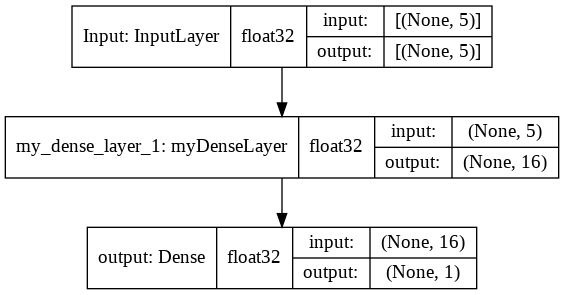

In [26]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [27]:
def separate(df):
  return df[['Sound Pressure']].to_numpy(), df.drop(df[['Sound Pressure']], axis=1).to_numpy()

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
df_normed = pd.DataFrame(min_max_scaler.fit_transform(dataset))
df_normed.columns = list(dataset.columns)
train_set, test_set = train_test_split(df_normed)
train_labels, train_features = separate(train_set)
test_labels, test_features = separate(test_set)

# Train and check the results
___

In [29]:
myLayer.variables

[<tf.Variable 'my_dense_layer_1/a:0' shape=(5, 16) dtype=float32, numpy=
 array([[-0.03451587,  0.03088213, -0.05236165,  0.02076846,  0.06712272,
         -0.00880717,  0.04240997,  0.04389083, -0.00536566, -0.01071667,
          0.00666007,  0.06948458,  0.05136887, -0.07996163,  0.04048547,
          0.06866663],
        [ 0.00906536, -0.00642299,  0.06230576, -0.00457615,  0.02364857,
         -0.02463411, -0.04944746,  0.03677725, -0.00913458,  0.05293687,
          0.00593558,  0.04212661,  0.00696341, -0.03278783,  0.01742713,
          0.01795734],
        [ 0.04339762, -0.06832769, -0.058321  ,  0.05641976, -0.04334372,
          0.01530506, -0.04145447,  0.0273359 , -0.00843023, -0.01100345,
          0.09399862,  0.0064184 ,  0.00288724,  0.04128626,  0.04970966,
         -0.02446022],
        [ 0.02080261,  0.01218926, -0.02792056,  0.06548008, -0.00859293,
         -0.08103111, -0.01667427,  0.07116719,  0.01789568,  0.01460522,
         -0.12519448, -0.02730668, -0.048533

In [30]:
history = model.fit(
    train_features,
    train_labels,
    batch_size = 32,
    epochs=1000,
    validation_data=(test_features,
                     test_labels)
)

Epoch 1/1000
36/36 [==============================] - 1s 6ms/step - loss: 0.2391 - mae: 0.4409 - mse: 0.2391 - val_loss: 0.1223 - val_mae: 0.3019 - val_mse: 0.1223
Epoch 2/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0904 - mae: 0.2501 - mse: 0.0904 - val_loss: 0.0709 - val_mae: 0.2172 - val_mse: 0.0709
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0671 - mae: 0.2138 - mse: 0.0671 - val_loss: 0.0565 - val_mae: 0.1938 - val_mse: 0.0565
Epoch 4/1000
36/36 [==============================] - 0s 3ms/step - loss: 0.0552 - mae: 0.1942 - mse: 0.0552 - val_loss: 0.0457 - val_mae: 0.1747 - val_mse: 0.0457
Epoch 5/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0457 - mae: 0.1771 - mse: 0.0457 - val_loss: 0.0366 - val_mae: 0.1560 - val_mse: 0.0366
Epoch 6/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.0378 - mae: 0.1609 - mse: 0.0378 - val_loss: 0.0299 - val_mae: 0.1410 - val_mse: 0.0299
Epoch 7/1000
36/

In [31]:
myLayer.variables

[<tf.Variable 'my_dense_layer_1/a:0' shape=(5, 16) dtype=float32, numpy=
 array([[ 1.65506065e+00,  2.28258893e-02, -7.62023255e-02,
          4.86667007e-02,  3.69821846e-01, -1.87489260e-02,
          2.33179852e-01,  2.60018408e-01, -2.16297340e-02,
         -2.51971316e-02, -5.31220675e+00,  3.08867812e-01,
          2.97251999e-01, -5.53254783e-01,  2.95647711e-01,
          2.99679011e-01],
        [-1.72652990e-01, -1.22811003e-02,  3.18607241e-02,
         -1.20200112e-01,  2.94333082e-02, -3.78874056e-02,
          1.17029734e-02,  4.92640026e-02, -2.81195808e-02,
          2.98546422e-02, -1.34699300e-01,  8.91409665e-02,
          4.47118245e-02, -6.85425401e-01,  6.61081001e-02,
          2.56120972e-02],
        [ 1.54627100e-01, -7.80134946e-02, -8.01186264e-02,
         -2.61808783e-01,  2.00609844e-02,  1.33201736e-03,
         -2.23969594e-01,  2.78149042e-02, -2.06573065e-02,
         -2.33380534e-02, -1.23709492e-01,  5.50820567e-02,
          4.59840968e-02, -9.1526

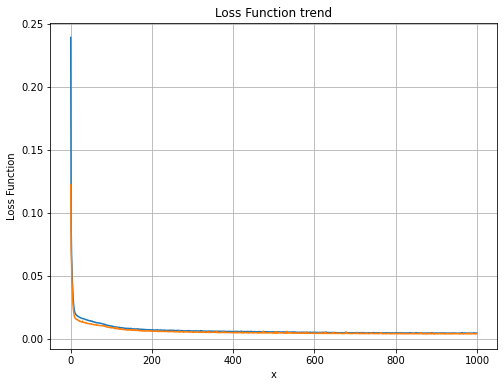

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss)
plt.plot(val_loss)
plt.grid('both')
plt.xlabel('x')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.show()


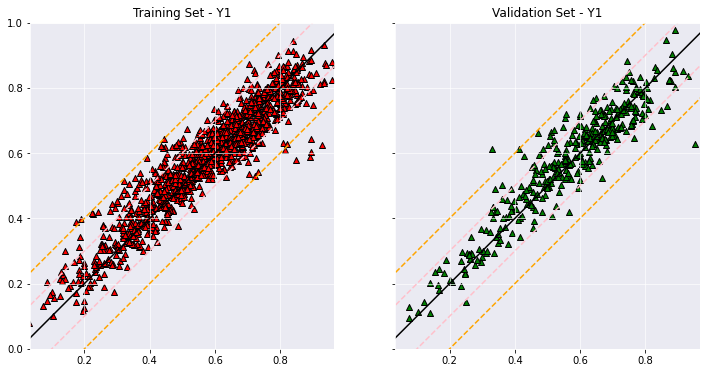

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax[0].axis('equal')
ax[0].scatter(train_labels[:, 0], model.predict(train_features)[:, 0], marker='^',
          color='r', edgecolor='k')
ax[0].plot([0, 1], [0, 1], c='k')
ax[0].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[0].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[0].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[0].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[0].set_title('Training Set - Y1')
ax[0].set_ylim(0, 1)
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')

ax[1].axis('equal')
ax[1].scatter(test_labels[:, 0], model.predict(test_features)[:, 0], marker='^',
          color='g', edgecolor='k')
ax[1].plot([0, 1], [0, 1], c='k')
ax[1].plot([0, 1], [0.2, 1.2],'--', c='orange')
ax[1].plot([0, 1], [-0.2, 0.8],'--', c='orange')
ax[1].plot([0, 1], [0.1, 1.1],'--', c='pink')
ax[1].plot([0, 1], [-0.1, 0.9],'--', c='pink')
ax[1].set_title('Validation Set - Y1')
ax[1].set_ylim(0, 1)
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')

In [34]:
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
for i in range(np.shape(train_labels)[1]): 
  metrics= {
      'mae-train': np.mean(np.abs(train_labels[:, i] - model.predict(train_features)[:, i])),
      'mse-train': np.mean(np.square(train_labels[:, i] - model.predict(train_features)[:, i])),
      'r2-train': r2_score(train_labels[:, i], model.predict(train_features)[:, i]),
      'pearson-train': pearsonr(train_labels[:, i], model.predict(train_features)[:, i])[0],
      'mae-test': np.mean(np.abs(test_labels[:, i] - model.predict(test_features)[:, i])),
      'mse-test': np.mean(np.square(test_labels[:, i] - model.predict(test_features)[:, i])),
      'r2-test': r2_score(test_labels[:, i] ,model.predict(test_features)[:, i]),
      'pearson-test': pearsonr(test_labels[:, i], model.predict(test_features)[:, i])[0]
  }

  blue = lambda x: '\033[94m' + x + '\033[0m'
  yellow = lambda x: '\033[93m' + x + '\033[0m'

  for key in metrics:
      if 'train' in key:
          print(f'Y{i} - {blue(key)} - {str(metrics[key])[:7]}')
      else:
          print(f'Y{i} - {yellow(key)} - {str(metrics[key])[:7]}')

Y0 - mae-train - 0.05067
Y0 - mse-train - 0.00441
Y0 - r2-train - 0.87064
Y0 - pearson-train - 0.93566
Y0 - mae-test - 0.04748
Y0 - mse-test - 0.00402
Y0 - r2-test - 0.87471
Y0 - pearson-test - 0.93871


# Greetings
---

In [35]:
!pip install art
from art import tprint, aprint
tprint('See you on next videos!')
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)
subscribe()

 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 
